In [41]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
import seaborn as sn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
import networkx as nx
from networkx.algorithms import community
import numpy as np
import pandas as pd
import networkx as nx
import scipy.sparse as sp
from matplotlib.pyplot import figure
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

Data Collection and Analysis

In [32]:
# loading the malware dataset to a pandas DataFrame [Dataset 3]`
malware_dataset = pd.read_csv('/content/Drebinmalware.csv')

In [33]:
pd.read_csv?

In [34]:
malware_dataset.dropna(how='all', axis=1, inplace = True)
malware_dataset.isnull().sum()

transact                      0
onServiceConnected            0
bindService                   0
attachInterface               0
ServiceConnection             0
                             ..
ACCESS_FINE_LOCATION          0
SET_WALLPAPER_HINTS           0
SET_PREFERRED_APPLICATIONS    0
WRITE_SECURE_SETTINGS         0
class                         0
Length: 213, dtype: int64

In [ ]:
malware_dataset['class'].value_counts()

0    9476
1    5560
Name: class, dtype: int64

In [ ]:
# separating the data and labels
X = malware_dataset.drop(['class'], axis=1)
Y = malware_dataset['class']
print(Y)

0        1
1        1
2        1
3        1
4        1
        ..
15031    0
15032    0
15033    0
15034    0
15035    0
Name: class, Length: 15036, dtype: int64


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

X = malware_dataset.drop(['class'], axis=1)
y = malware_dataset['class']

# Create the stratified shuffle split object
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data into train and test sets
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [ ]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
### Finding non constant features
sum(var_thres.get_support())

212

Pearson Correlation

With the following function we can select highly correlated features it will remove the first feature that is correlated with anything other feature

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.75)
len(set(corr_features))

25

In [ ]:
corr_features

{'BLUETOOTH_ADMIN',
 'EXPAND_STATUS_BAR',
 'HttpUriRequest',
 'IBinder',
 'KeySpec',
 'Landroid.content.Context.unregisterReceiver',
 'Ljavax.crypto.Cipher',
 'PROCESS_OUTGOING_CALLS',
 'READ_HISTORY_BOOKMARKS',
 'READ_USER_DICTIONARY',
 'RECEIVE_BOOT_COMPLETED',
 'SUBSCRIBED_FEEDS_READ',
 'SecretKey',
 'ServiceConnection',
 'WRITE_CALENDAR',
 'WRITE_SOCIAL_STREAM',
 'WRITE_SYNC_SETTINGS',
 'android.intent.action.BATTERY_LOW',
 'android.intent.action.SCREEN_OFF',
 'android.os.Binder',
 'android.os.IBinder',
 'android.telephony.SmsManager',
 'attachInterface',
 'bindService',
 'onServiceConnected'}

In [35]:
malware_dataset.drop([
 'BLUETOOTH_ADMIN',
 'EXPAND_STATUS_BAR',
 'HttpUriRequest',
 'IBinder',
 'KeySpec',
 'Landroid.content.Context.unregisterReceiver',
 'Ljavax.crypto.Cipher',
 'PROCESS_OUTGOING_CALLS',
 'READ_HISTORY_BOOKMARKS',
 'READ_USER_DICTIONARY',
 'RECEIVE_BOOT_COMPLETED',
 'SUBSCRIBED_FEEDS_READ',
 'SecretKey',
 'ServiceConnection',
 'WRITE_CALENDAR',
 'WRITE_SOCIAL_STREAM',
 'WRITE_SYNC_SETTINGS',
 'android.intent.action.BATTERY_LOW',
 'android.intent.action.SCREEN_OFF',
 'android.os.IBinder',
 'android.telephony.SmsManager',
 'bindService',
 'onServiceConnected'], axis=1 ,inplace=True)

In [ ]:
malware_dataset

,transact,attachInterface,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,Ljava.net.URLDecoder,android.content.pm.Signature,READ_PHONE_STATE,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,1,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,0,1,1,1,1,1,1,...,0,0,0,1,1,0,0,0,0,0
15032,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
15033,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
15034,1,1,1,0,1,1,1,1,1,0,...,1,0,0,1,1,1,0,0,0,0


In [ ]:
price_corr = malware_dataset.corr()['class'].sort_values(ascending=False)
print(price_corr)

class                                1.000000
SEND_SMS                             0.545650
READ_PHONE_STATE                     0.408542
RECEIVE_SMS                          0.387995
READ_SMS                             0.370009
                                       ...   
Ljava.net.URLDecoder                -0.444374
Ljava.lang.Class.getCanonicalName   -0.467702
attachInterface                     -0.551578
android.os.Binder                   -0.553786
transact                            -0.570235
Name: class, Length: 190, dtype: float64


[Text(0.5, 0, 'READ_CONTACTS\t'),
 Text(0, 0.5, 'Class'),
 Text(0.5, 1.0, 'Class vs transact ')]

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)


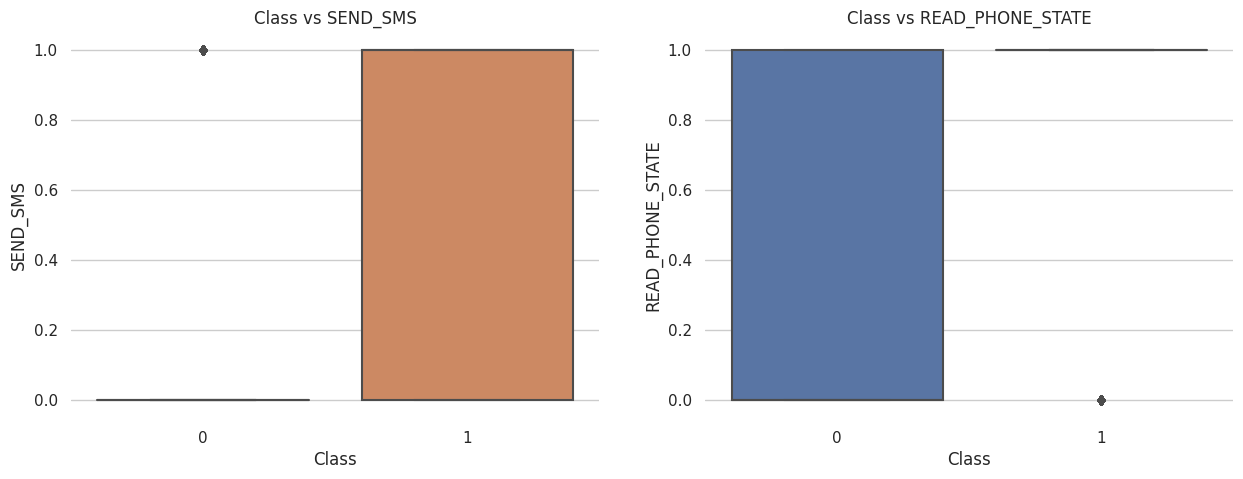

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


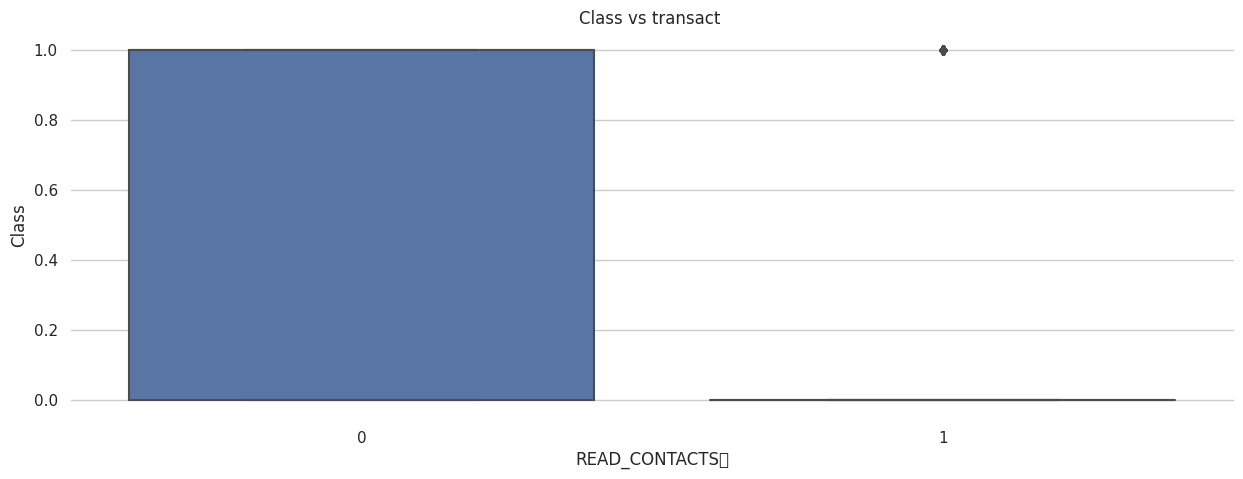

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=malware_dataset['class'],y=malware_dataset['SEND_SMS'	], ax=axes[0])
sns.boxplot(x=malware_dataset['class'],y=malware_dataset['READ_PHONE_STATE'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Class', ylabel='SEND_SMS', title='Class vs SEND_SMS')
axes[1].set(xlabel='Class', ylabel='READ_PHONE_STATE', title='Class vs READ_PHONE_STATE')

f, axe = plt.subplots(1, 1,figsize=(15,5))
sns.boxplot(x=malware_dataset['transact'],y=malware_dataset['class'], ax=axe)
sns.despine(left=True, bottom=True)
axe.set(xlabel= 'READ_CONTACTS	', ylabel='Class', title='Class vs READ_CONTACTS')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Feature'] = malware_dataset.columns
vif['vif'] = [variance_inflation_factor(malware_dataset.values, i) for i in range(malware_dataset.shape[1])]
vif['vif'] = round(vif['vif'],2)
vif = vif.sort_values(by = 'vif', ascending = False)

In [ ]:
vif

,Feature,vif
0,transact,32.54
1,attachInterface,26.22
42,INTERNET,17.53
44,Binder,14.29
2,android.os.Binder,12.38
...,...,...
88,CHANGE_WIFI_MULTICAST_STATE,1.16
141,BIND_ACCESSIBILITY_SERVICE,1.15
161,intent.action.RUN,1.10
135,Context.bindService,1.10


Standardization

fit and transform

In [ ]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [ ]:
X = malware_dataset.drop(['class'], axis=1)
y = malware_dataset['class']


In [ ]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

In [ ]:
malware_dataset.columns

Index(['transact', 'attachInterface', 'android.os.Binder', 'SEND_SMS',
       'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods',
       'Ljava.lang.Class.cast', 'Ljava.net.URLDecoder',
       'android.content.pm.Signature', 'READ_PHONE_STATE',
       ...
       'READ_CONTACTS', 'DEVICE_POWER', 'HARDWARE_TEST', 'ACCESS_WIFI_STATE',
       'WRITE_EXTERNAL_STORAGE', 'ACCESS_FINE_LOCATION', 'SET_WALLPAPER_HINTS',
       'SET_PREFERRED_APPLICATIONS', 'WRITE_SECURE_SETTINGS', 'class'],
      dtype='object', length=190)

PCA

In [ ]:
df_mod = malware_dataset.loc[:, ~malware_dataset.columns.isin(['class'])]
df_mod

,transact,attachInterface,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,Ljava.net.URLDecoder,android.content.pm.Signature,READ_PHONE_STATE,...,SET_ORIENTATION,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,1,1,1,0,0,0
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,1,1,0,0,0,0
15032,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,1,0,0,0,0
15033,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
15034,1,1,1,0,1,1,1,1,1,0,...,0,1,0,0,1,1,1,0,0,0


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 169)
components = pca.fit_transform(df_mod)
componentsDF = pd.DataFrame(components)

In [ ]:
componentsDF

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
0,-2.463605,-0.159021,0.234962,0.380081,-0.563940,-0.860909,-0.127632,0.753295,-0.031714,-0.462552,...,-0.006176,-0.000318,0.010797,-0.006899,-0.002302,0.007914,0.005056,-0.006953,-0.001915,0.008112
1,-2.217898,0.407071,0.572522,0.615570,-0.841592,-1.100460,-0.096015,1.174194,0.106287,-0.777692,...,0.008106,0.006222,-0.007434,-0.000498,-0.000632,-0.001440,-0.000533,0.000663,-0.006208,0.009229
2,-1.796997,-0.387712,-0.233881,0.868383,-0.715650,0.073414,0.505755,0.189348,0.784726,0.178618,...,-0.006556,0.013968,0.013503,-0.013652,-0.007645,-0.000459,-0.011080,-0.006679,0.007054,-0.007472
3,0.947663,2.000974,-2.142587,-0.863883,0.373984,-0.951632,0.292710,-0.138087,-0.005838,0.599484,...,-0.038582,-0.035722,0.022636,-0.018236,-0.022864,0.014091,-0.013090,-0.019556,0.042262,-0.015691
4,-0.297992,0.416725,-1.370681,2.265435,0.442793,1.050602,0.001657,0.075510,-0.416891,0.257737,...,-0.021848,-0.024659,-0.039938,-0.002784,-0.010495,0.020560,-0.034430,-0.009442,0.001271,0.013122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,2.305700,-1.232773,-0.505354,-0.266762,-1.179471,0.025647,0.320064,-0.019001,-0.069282,-0.211180,...,0.018480,-0.008711,-0.003673,0.017041,-0.000237,-0.013312,-0.003093,-0.006494,-0.005498,0.007294
15032,0.271668,-0.881461,-0.743569,-0.122056,-0.012539,0.916087,0.949621,-0.129171,0.981377,0.274036,...,0.012427,0.028237,-0.000782,-0.011061,-0.016053,0.002958,-0.027709,-0.003315,-0.004225,0.003448
15033,-1.584594,-0.009186,-0.983248,0.042240,0.153378,0.345858,-0.238815,0.375001,0.269966,-0.501874,...,-0.000745,0.009291,0.001907,0.007782,-0.004019,-0.008565,0.018691,0.000900,-0.011028,-0.010509
15034,2.701772,-0.464380,0.268356,1.026722,1.006601,-0.088946,0.401120,-0.343730,-0.064075,-0.229760,...,-0.004852,0.016121,0.005930,-0.095770,-0.000020,0.094188,-0.087947,-0.029012,-0.043372,-0.016508


calculate the VIF again

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Feature'] = df_mod.columns
vif['vif'] = [variance_inflation_factor(df_mod.values, i) for i in range(df_mod.shape[1])]
vif['vif'] = round(vif['vif'],2)
vif = vif.sort_values(by = 'vif', ascending = False)

In [ ]:
vif

,Feature,vif
0,transact,32.49
1,attachInterface,26.22
42,INTERNET,15.31
44,Binder,14.29
2,android.os.Binder,12.36
...,...,...
88,CHANGE_WIFI_MULTICAST_STATE,1.15
141,BIND_ACCESSIBILITY_SERVICE,1.15
135,Context.bindService,1.10
161,intent.action.RUN,1.10


In [36]:
malware_dataset.drop(['transact',
             'attachInterface',
             'INTERNET',
             'Binder',
             'android.os.Binder',
             'Ljava.lang.Object.getClass',
             'Ljava.lang.Class.forName',
             'onBind',
             'Ljava.lang.Class.getMethod',
             'ClassLoader',
             'mount',
             'Ljava.lang.Class.getDeclaredField',
             'Ljava.lang.Class.getField',
             'android.content.pm.Signature',
             'Runtime.getRuntime',
             'HttpPost.init',
             'TelephonyManager.getDeviceId',
             'HttpGet.init',
             'WRITE_EXTERNAL_STORAGE',
             'MANAGE_ACCOUNTS',
             'ACCESS_NETWORK_STATE',
             'android.content.pm.PackageInfo',
             'SET_WALLPAPER_HINTS',
             'DEVICE_POWER',
             'ACCESS_FINE_LOCATION',
             'android.intent.action.PACKAGE_RESTARTED',
             'defineClass',
             'SET_PROCESS_LIMIT',
             'FLASHLIGHT',
             'CONTROL_LOCATION_UPDATES',
             'BIND_ACCESSIBILITY_SERVICE',
             'ADD_VOICEMAIL',
             'CALL_PHONE',
             'RECEIVE_MMS',
             'SET_TIME_ZONE',
             'READ_SYNC_SETTINGS',
             'WRITE_HISTORY_BOOKMARKS',
             'CAMERA',
             'createSubprocess',
             'android.intent.action.TIMEZONE_CHANGED',
             'WAKE_LOCK',
             'chmod',
             'PathClassLoader',
             'BLUETOOTH',
             'READ_CALENDAR',
             'VIBRATE',
             'BIND_WALLPAPER',
             'RECEIVE_WAP_PUSH',
             'DUMP',
             'BATTERY_STATS',
             'ACCESS_COARSE_LOCATION',
             'SET_TIME',
             'MessengerService',
             'KILL_BACKGROUND_PROCESSES',
             'SET_ALARM',
             'Ljava.lang.Class.getResource',
             'MOUNT_UNMOUNT_FILESYSTEMS',
             'BIND_TEXT_SERVICE'


],axis=1,inplace = True)

In [ ]:
malware_dataset

,transact,attachInterface,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,Ljava.net.URLDecoder,android.content.pm.Signature,READ_PHONE_STATE,...,CHANGE_COMPONENT_ENABLED_STATE,CLEAR_APP_CACHE,SET_ORIENTATION,READ_CONTACTS,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,1,1,0,0,1
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,1,1,0,0,0
15032,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,1,0,0,0
15033,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
15034,1,1,1,0,1,1,1,1,1,0,...,0,0,0,1,0,1,1,0,0,0


Feature Selection

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Define the  variable

X = malware_dataset.drop(['class'], axis=1)
y = malware_dataset['class']

# Create the stratified shuffle split object
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data into train and test sets
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)


transact                             0.185746
android.os.Binder                    0.184246
attachInterface                      0.178671
SEND_SMS                             0.152644
Ljava.lang.Class.getCanonicalName    0.136523
                                       ...   
BIND_INPUT_METHOD                    0.000000
findClass                            0.000000
SYSTEM_ALERT_WINDOW                  0.000000
MOUNT_FORMAT_FILESYSTEMS             0.000000
TelephonyManager.isNetworkRoaming    0.000000
Length: 153, dtype: float64

In [ ]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top most important features
sel_five_cols = SelectKBest(mutual_info_classif, k=70)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['SEND_SMS', 'Ljava.lang.Class.getCanonicalName',
       'Ljava.lang.Class.getMethods', 'Ljava.lang.Class.cast',
       'Ljava.net.URLDecoder', 'READ_PHONE_STATE', 'getBinder',
       'Landroid.content.Context.registerReceiver', 'GET_ACCOUNTS',
       'RECEIVE_SMS', 'READ_SMS', 'getCallingUid',
       'Ljavax.crypto.spec.SecretKeySpec',
       'android.intent.action.BOOT_COMPLETED', 'USE_CREDENTIALS',
       'TelephonyManager.getLine1Number', 'DexClassLoader',
       'System.loadLibrary', 'android.intent.action.SEND', 'WRITE_SMS',
       'AUTHENTICATE_ACCOUNTS', 'android.telephony.gsm.SmsManager',
       'TelephonyManager.getSubscriberId', 'INSTALL_PACKAGES',
       'android.intent.action.PACKAGE_REPLACED',
       'android.intent.action.SEND_MULTIPLE', 'RECORD_AUDIO', 'NFC',
       'ACCESS_LOCATION_EXTRA_COMMANDS', 'URLClassLoader',
       'WRITE_APN_SETTINGS', 'abortBroadcast', 'BIND_REMOTEVIEWS',
       'android.intent.action.TIME_SET', 'READ_PROFILE',
       'MODIFY_AUDIO_SETT

Stratifiedshufflesplit to split the data

In [37]:
df_mod = malware_dataset[['SEND_SMS', 'Ljava.lang.Class.getCanonicalName',
       'Ljava.lang.Class.getMethods', 'Ljava.lang.Class.cast',
       'Ljava.net.URLDecoder', 'READ_PHONE_STATE', 'getBinder',
       'Landroid.content.Context.registerReceiver', 'GET_ACCOUNTS',
       'RECEIVE_SMS', 'READ_SMS', 'getCallingUid',
       'Ljavax.crypto.spec.SecretKeySpec',
       'android.intent.action.BOOT_COMPLETED', 'USE_CREDENTIALS',
       'TelephonyManager.getLine1Number', 'DexClassLoader',
       'System.loadLibrary', 'android.intent.action.SEND', 'WRITE_SMS',
       'AUTHENTICATE_ACCOUNTS', 'android.telephony.gsm.SmsManager',
       'TelephonyManager.getSubscriberId', 'INSTALL_PACKAGES',
       'android.intent.action.PACKAGE_REPLACED',
       'android.intent.action.SEND_MULTIPLE', 'RECORD_AUDIO', 'NFC',
       'ACCESS_LOCATION_EXTRA_COMMANDS', 'URLClassLoader',
       'WRITE_APN_SETTINGS', 'abortBroadcast', 'BIND_REMOTEVIEWS',
       'android.intent.action.TIME_SET', 'READ_PROFILE',
       'MODIFY_AUDIO_SETTINGS', 'getCallingPid', 'READ_SYNC_STATS',
       'BROADCAST_STICKY', 'android.intent.action.PACKAGE_REMOVED',
       'RESTART_PACKAGES', 'Ljava.lang.Class.getPackage',
       'Ljava.lang.Class.getDeclaredClasses',
       'android.intent.action.ACTION_POWER_DISCONNECTED',
       'android.intent.action.PACKAGE_ADDED',
       'TelephonyManager.getSimSerialNumber', 'Runtime.load',
       'TelephonyManager.getCallState', 'READ_CALL_LOG',
       'SUBSCRIBED_FEEDS_WRITE', 'PackageInstaller', 'remount',
       'sendDataMessage', 'Ljava.lang.Class.getClasses',
       'TelephonyManager.isNetworkRoaming', 'CHANGE_WIFI_MULTICAST_STATE',
       'UPDATE_DEVICE_STATS', 'DELETE_PACKAGES', 'WRITE_USER_DICTIONARY',
       'SET_WALLPAPER', 'BIND_INPUT_METHOD', '/system/bin',
       'BIND_DEVICE_ADMIN', '/system/app', 'TelephonyManager.getSimOperator',
       'android.intent.action.SCREEN_ON', 'Context.bindService',
       'BIND_APPWIDGET', 'CHANGE_CONFIGURATION',
       'android.intent.action.SET_WALLPAPER']]

df_mod

,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,Ljava.net.URLDecoder,READ_PHONE_STATE,getBinder,Landroid.content.Context.registerReceiver,GET_ACCOUNTS,RECEIVE_SMS,...,BIND_INPUT_METHOD,/system/bin,BIND_DEVICE_ADMIN,/system/app,TelephonyManager.getSimOperator,android.intent.action.SCREEN_ON,Context.bindService,BIND_APPWIDGET,CHANGE_CONFIGURATION,android.intent.action.SET_WALLPAPER
0,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,0,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15032,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15033,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15034,0,1,1,1,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Feature'] = df_mod.columns
vif['vif'] = [variance_inflation_factor(df_mod.values, i) for i in range(df_mod.shape[1])]
vif['vif'] = round(vif['vif'],2)
vif = vif.sort_values(by = 'vif', ascending = False)

In [ ]:
vif

,Feature,vif
1,Ljava.lang.Class.getCanonicalName,5.22
3,Ljava.lang.Class.cast,4.49
2,Ljava.lang.Class.getMethods,4.09
4,Ljava.net.URLDecoder,4.07
12,Ljavax.crypto.spec.SecretKeySpec,4.05
...,...,...
58,BIND_INPUT_METHOD,1.12
74,SET_ORIENTATION,1.11
52,CHANGE_WIFI_MULTICAST_STATE,1.08
70,intent.action.RUN,1.04


In [ ]:
df_mod

,Ljava.lang.Class.getMethods,getBinder,Landroid.content.Context.registerReceiver,GET_ACCOUNTS,getCallingUid,Ljavax.crypto.spec.SecretKeySpec,android.intent.action.BOOT_COMPLETED,USE_CREDENTIALS,TelephonyManager.getLine1Number,DexClassLoader,...,Process.start,Context.bindService,findClass,CLEAR_APP_USER_DATA,intent.action.RUN,READ_FRAME_BUFFER,ACCESS_SURFACE_FLINGER,BROADCAST_SMS,SET_ACTIVITY_WATCHER,DISABLE_KEYGUARD
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15032,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15034,1,0,1,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


Using Smote

In [38]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

In [39]:
from sklearn.model_selection import StratifiedShuffleSplit

# Define the target variable
y = malware_dataset['class']

# Define the features
X = df_mod

# Create the stratified shuffle split object
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data into train and test sets
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [40]:
oversample = SMOTETomek()
X_train, y_train = oversample.fit_resample(X_train, y_train)
X_test, y_test = oversample.fit_resample(X_test, y_test)

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn import svm
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split

#
# Create a Decision Tree classifier
#

DT = DecisionTreeClassifier(max_features='auto', min_samples_leaf=1,min_samples_split=3,
                       random_state=12345)
# Create a KNN classifier
#
KNN= KNeighborsClassifier(algorithm='auto', metric_params=None, n_jobs=-1,
                           n_neighbors=5, p=3,weights='uniform')
#
# Create a Logistic regression classifier
#

lgclassifier =   LogisticRegression( max_iter = 1000,penalty = 'l2', solver = 'newton-cg',n_jobs=-1)
#
#Create Svm classifier
#

Svm = svm.SVC(C=3, decision_function_shape = 'ovr', kernel= 'rbf', probability=True)
#
#Create Naive-Bayes Classifier
#

NB= GaussianNB(var_smoothing=0.0533669923120631)

#
#Create Random forest Classifier
#

forest = RandomForestClassifier(  max_features= 'sqrt', min_samples_leaf= 1, min_samples_split = 2, n_estimators= 100, n_jobs=-1,)
#SGD

SGD =  SGDClassifier(alpha= 0.0001 ,loss='log', penalty='l1', max_iter=30, random_state=42)

#xgb

XGB = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=2)

#Passive Aggresive

PA =  PassiveAggressiveClassifier(C= 0.01, fit_intercept= True, loss= 'squared_hinge', max_iter= 100 ,tol=1e-3)

#ExtraTree

ET = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=2)

#Perceptron

PT = Perceptron(alpha= 0.0001, eta0 =0.01, max_iter =10, penalty= 'l2', random_state =42)

#LGM
LGM =  lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, random_state=2)

#Ridge Classifier

RC =  RidgeClassifier(alpha=0.1, solver='auto', random_state=2)



#
# Fit the random forest classifier; Print the scores
#
forest.fit(X_train, y_train)
X_test_prediction = forest.predict(X_test)
X_test_prediction_rf = forest.predict(X_test)
## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"Random forest model training Accuracy: {forest.score(X_train, y_train):0.4f}")
print(f"Random forest model test Accuracy: {forest.score(X_test, y_test):0.4f}")
print(f"Random forest model test Precision: {precision_scores:0.4f}")
print(f"Random forest model test recall: {recall_scores:0.4f}")
print(f"Random forest model test f1-scores: {f1:0.4f}")

#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")
#ploting Confusion Matrix

y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))
print('Sensitivity: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))


#
# Fit the Decision Tree classifier; Print the scores
#
DT.fit(X_train, y_train)
X_test_prediction = DT.predict(X_test)
X_test_prediction_dt = DT.predict(X_test)

## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"\nDecision Tree model training Accuracy: {DT.score(X_train, y_train):0.4f}")
print(f"Decision Tree model test Accuracy: {DT.score(X_test, y_test):0.4f}")
print(f"Decision Tree model test Precision: {precision_scores:0.4f}")
print(f"Decision Tree model test recall: {recall_scores:0.4f}")
print(f"Decision Tree model test f1-scores: {f1:0.4f}")
#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")
#ploting Confusion Matrix
y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))
print('Sensitivity: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

#
# Fit the KNN classifier; Print the scores
#
KNN.fit(X_train, y_train)
X_test_prediction = KNN.predict(X_test)
X_test_prediction_knn = KNN.predict(X_test)
## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"\nKNN model training Accuracy: {KNN.score(X_train, y_train):0.4f}")
print(f"KNN model test Accuracy: {KNN.score(X_test, y_test):0.4f}")
print(f"KNN model test Precision: {precision_scores:0.4f}")
print(f"KNN model test recall: {recall_scores:0.4f}")
print(f"KNN model test f1-scores: {f1:0.4f}")
#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")
#ploting Confusion Matrix
y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))
print('Sensitivity: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

#
# Fit the Naive-Bayes classifier; Print the scores
#
NB.fit(X_train, y_train)
X_test_prediction = NB.predict(X_test)
X_test_prediction_gnb = NB.predict(X_test)

## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"\nNaive-Bayes model training Accuracy: {NB.score(X_train, y_train):0.4f}")
print(f"Naive-Bayes model test Accuracy: {NB.score(X_test, y_test):0.4f}")
print(f"Naive_Bayes model test Precision: {precision_scores:0.4f}")
print(f"Naive_Bayes model test recall: {recall_scores:0.4f}")
print(f"Naive-Bayes model test f1-scores: {f1:0.4f}")
#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")
#ploting Confusion Matrix
y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))
print('Sensitivity: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

#
# Fit the SVM classifier; Print the scores
#
Svm.fit(X_train, y_train)
X_test_prediction = Svm.predict(X_test)
X_test_prediction_svm = Svm.predict(X_test)

## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"\nSvm model training Accuracy: {Svm.score(X_train, y_train):0.4f}")
print(f"Svm model test Accuracy: {Svm.score(X_test, y_test):0.4f}")
print(f"SVM model test Precision: {precision_scores:0.4f}")
print(f"SVM model test recall: {recall_scores:0.4f}")
print(f"SVM model test f1-scores: {f1:0.4f}")
#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")
#ploting Confusion Matrix
y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))
print('Sensitivity: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))


#
# Fit the Logistic Regression classifier; Print the scores
#
lgclassifier.fit(X_train, y_train)
X_test_prediction = lgclassifier.predict(X_test)
X_test_prediction_log = lgclassifier.predict(X_test)

## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"\nLogistic Regression model training Accuracy: {lgclassifier.score(X_train, y_train):0.4f}")
print(f"Logistic Regression model test Accuracy: {lgclassifier.score(X_test, y_test):0.4f}")
print(f"Logistic Regression model test Precision: {precision_scores:0.4f}")
print(f"Logistic Regression model test recall: {recall_scores:0.4f}")
print(f"Logistic Regression model test f1-scores: {f1:0.4f}")
#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")
#ploting Confusion Matrix
y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))
print('Sensitivity: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

#SGD

SGD.fit(X_train, y_train)
X_test_prediction = SGD.predict(X_test)
X_test_prediction_sgd = SGD.predict(X_test)
## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"\nStochastic Gradient Descent model training Accuracy: {SGD.score(X_train, y_train):0.4f}")
print(f"Stochastic Gradient Descent model test Accuracy: {SGD.score(X_test, y_test):0.4f}")
print(f"Stochastic Gradient Descent model test Precision: {precision_scores:0.4f}")
print(f"Stochastic Gradient Descent model test recall: {recall_scores:0.4f}")
print(f"Stochastic Gradient Descentmodel test f1-scores: {f1:0.4f}")
#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")
#ploting Confusion Matrix
y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))
print('Sensitivity: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

#XGB

XGB.fit(X_train, y_train)
X_test_prediction = XGB.predict(X_test)
X_test_prediction_xgb = XGB.predict(X_test)

## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"\nXGBoost model training Accuracy: {XGB.score(X_train, y_train):0.4f}")
print(f"XGBoost model test Accuracy: {XGB.score(X_test, y_test):0.4f}")
print(f"XGBoost model test Precision: {precision_scores:0.4f}")
print(f"XGBoost model test recall: {recall_scores:0.4f}")
print(f"XGBoost model test f1-scores: {f1:0.4f}")
#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")
#ploting Confusion Matrix
y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))
print('Sensitivity: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

#PA

PA.fit(X_train, y_train)
X_test_prediction = PA.predict(X_test)
X_test_prediction_pa= PA.predict(X_test)

## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"\Passive aggressive model training Accuracy: {PA.score(X_train, y_train):0.4f}")
print(f"Passive aggressive model test Accuracy: {PA.score(X_test, y_test):0.4f}")
print(f"Passive aggressive model test Precision: {precision_scores:0.4f}")
print(f"Passive aggressive model test recall: {recall_scores:0.4f}")
print(f"Passive aggressivemodel test f1-scores: {f1:0.4f}")
#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")
#ploting Confusion Matrix
y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))
print('Sensitivity: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

#ET

ET.fit(X_train, y_train)
X_test_prediction = ET.predict(X_test)
X_test_prediction_et = ET.predict(X_test)
## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"\nExtra Trees Classifier model training Accuracy: {ET.score(X_train, y_train):0.4f}")
print(f"Extra Trees Classifier model test Accuracy: {ET.score(X_test, y_test):0.4f}")
print(f"Extra Trees Classifiermodel test Precision: {precision_scores:0.4f}")
print(f"Extra Trees Classifiermodel test recall: {recall_scores:0.4f}")
print(f"Extra Trees Classifier model test f1-scores: {f1:0.4f}")
#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")
#ploting Confusion Matrix
y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))
print('Sensitivity: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

#PT

PT.fit(X_train, y_train)
X_test_prediction = PT.predict(X_test)
X_test_prediction_pt = PT.predict(X_test)
## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"\nPerceptron model training Accuracy: {PT.score(X_train, y_train):0.4f}")
print(f"Perceptron model test Accuracy: {PT.score(X_test, y_test):0.4f}")
print(f"Perceptron model test Precision: {precision_scores:0.4f}")
print(f"Perceptron model test recall: {recall_scores:0.4f}")
print(f"Perceptron  model test f1-scores: {f1:0.4f}")
#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")
#ploting Confusion Matrix
y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))
print('Sensitivity: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

#LGM

LGM.fit(X_train, y_train)
X_test_prediction = LGM.predict(X_test)
X_test_prediction_lgm = LGM.predict(X_test)


## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"\nLightGBM model training Accuracy: {LGM.score(X_train, y_train):0.4f}")
print(f"LightGBM model test Accuracy: {LGM.score(X_test, y_test):0.4f}")
print(f"LightGBM model test Precision: {precision_scores:0.4f}")
print(f"LightGBM model test recall: {recall_scores:0.4f}")
print(f"LightGBM model test f1-scores: {f1:0.4f}")

#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")
#ploting Confusion Matrix
y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))
print('Sensitivity: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

#RC

RC.fit(X_train, y_train)
X_test_prediction = RC.predict(X_test)
X_test_prediction_rc = RC.predict(X_test)

## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"\nRidge Classifier model training Accuracy: {RC.score(X_train, y_train):0.4f}")
print(f"Ridge Classifier model test Accuracy: {RC.score(X_test, y_test):0.4f}")
print(f"Ridge Classifier model test Precision: {precision_scores:0.4f}")
print(f"Ridge Classifier model test recall: {recall_scores:0.4f}")
print(f"Ridge Classifier model test f1-scores: {f1:0.4f}")
#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")
#ploting Confusion Matrix
y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))
print('Sensitivity: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))



Random forest model training Accuracy: 0.9803
Random forest model test Accuracy: 0.9702
Random forest model test Precision: 0.9790
Random forest model test recall: 0.9609
Random forest model test f1-scores: 0.9699
showing Confusion Matrix 
 [[1854   39]
 [  74 1819]] 

Benign Malware Correctly Detected (True Negatives): 1854
Incorrectly Detected (False Positives)):  39
Malicious Malware Missed (False Negatives):  74
Malicious malware Detected (True Positives)):  1819
Total malware:   1893
Sensitivity:  0.9609086106708927
Specificity:  0.9793977812995246

Decision Tree model training Accuracy: 0.9781
Decision Tree model test Accuracy: 0.9614
Decision Tree model test Precision: 0.9724
Decision Tree model test recall: 0.9498
Decision Tree model test f1-scores: 0.9610
showing Confusion Matrix 
 [[1842   51]
 [  95 1798]] 

Benign Malware Correctly Detected (True Negatives): 1842
Incorrectly Detected (False Positives)):  51
Malicious Malware Missed (False Negatives):  95
Malicious malware D

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(



KNN model training Accuracy: 0.9688
KNN model test Accuracy: 0.9633
KNN model test Precision: 0.9635
KNN model test recall: 0.9630
KNN model test f1-scores: 0.9633
showing Confusion Matrix 
 [[1824   69]
 [  70 1823]] 

Benign Malware Correctly Detected (True Negatives): 1824
Incorrectly Detected (False Positives)):  69
Malicious Malware Missed (False Negatives):  70
Malicious malware Detected (True Positives)):  1823
Total malware:   1893
Sensitivity:  0.9630216587427364
Specificity:  0.9635499207606973

Naive-Bayes model training Accuracy: 0.8504
Naive-Bayes model test Accuracy: 0.8394
Naive_Bayes model test Precision: 0.7636
Naive_Bayes model test recall: 0.9831
Naive-Bayes model test f1-scores: 0.8596
showing Confusion Matrix 
 [[1317  576]
 [  32 1861]] 

Benign Malware Correctly Detected (True Negatives): 1317
Incorrectly Detected (False Positives)):  576
Malicious Malware Missed (False Negatives):  32
Malicious malware Detected (True Positives)):  1861
Total malware:   1893
Sen

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(



Stochastic Gradient Descent model training Accuracy: 0.9546
Stochastic Gradient Descent model test Accuracy: 0.9493
Stochastic Gradient Descent model test Precision: 0.9605
Stochastic Gradient Descent model test recall: 0.9371
Stochastic Gradient Descentmodel test f1-scores: 0.9487
showing Confusion Matrix 
 [[1820   73]
 [ 119 1774]] 

Benign Malware Correctly Detected (True Negatives): 1820
Incorrectly Detected (False Positives)):  73
Malicious Malware Missed (False Negatives):  119
Malicious malware Detected (True Positives)):  1774
Total malware:   1893
Sensitivity:  0.9371368198626518
Specificity:  0.9614368726888537

XGBoost model training Accuracy: 0.9762
XGBoost model test Accuracy: 0.9675
XGBoost model test Precision: 0.9784
XGBoost model test recall: 0.9562
XGBoost model test f1-scores: 0.9671
showing Confusion Matrix 
 [[1853   40]
 [  83 1810]] 

Benign Malware Correctly Detected (True Negatives): 1853
Incorrectly Detected (False Positives)):  40
Malicious Malware Missed (

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
#
# Create a Decision Tree classifier
#

DT = DecisionTreeClassifier(max_features='sqrt', min_samples_leaf= 1,min_samples_split=3,
                       random_state=12345)
#
# Create a KNN classifier
#
KNN= KNeighborsClassifier(algorithm='auto', leaf_size=30, metric_params=None, n_jobs=-1,
                           n_neighbors=3, p=1,weights='uniform')
#
# Create a Logistic regression classifier
#

lgclassifier =    LogisticRegression( max_iter = 1000,penalty = 'l2', solver = 'newton-cg',n_jobs=-1)

#
#Create Svm classifier
#

Svm = svm.SVC(C=8, decision_function_shape = 'ovr', gamma= 0.1, kernel= 'rbf', probability=True)

#
#Create Naive-Bayes Classifier
#

NB= GaussianNB(var_smoothing=0.0657933224657568)

#
#Create Random forest Classifier
#

forest = RandomForestClassifier( n_estimators=100,random_state=123, n_jobs=-1,)

#
# Create a stacking classifier
#
estimators = [
     ('rf', forest),
     ('dt', DT),
     ('knn', KNN),
     ('nb', NB),
     ('svm', Svm),
     ('log', lgclassifier)
]

model1 = [
     ('rf', forest),
     ('dt', DT),
     ('knn', KNN)
]

model2 = [
     ('rf', forest),
     ('dt', DT),
     ('svm', Svm)
]

model3 = [
     ('rf', forest),
     ('dt', DT),
     ('log', lgclassifier)
]

model4 = [
     ('rf', forest),
     ('knn', KNN),
     ('svm', Svm)
]

model5 = [
     ('rf', forest),
     ('svm', Svm),
     ('log', lgclassifier)
]

model6 = [
     ('dt', DT),
     ('knn', KNN),
     ('svm', Svm)
]

model7 = [
     ('dt', DT),
     ('knn', KNN),
     ('log',lgclassifier)
]

model8 = [
     ('dt', DT),
     ('svm', Svm),
     ('log', lgclassifier)
]

sclf1 = StackingClassifier(estimators=model1,
                            final_estimator=lgclassifier,
                            cv=10)

sclf2 = StackingClassifier(estimators=model2,
                            final_estimator=lgclassifier,
                            cv=10)

sclf3 = StackingClassifier(estimators=model3,
                            final_estimator=lgclassifier,
                            cv=10)

sclf4 = StackingClassifier(estimators=model4,
                            final_estimator=lgclassifier,
                            cv=10)

sclf5 = StackingClassifier(estimators=model5,
                            final_estimator=lgclassifier,
                            cv=10)

sclf6 = StackingClassifier(estimators=model6,
                            final_estimator=lgclassifier,
                            cv=10)

sclf7 = StackingClassifier(estimators=model7,
                            final_estimator=lgclassifier,
                            cv=10)

sclf8 = StackingClassifier(estimators=model8,
                            final_estimator=lgclassifier,
                            cv=10)




In [54]:
#
# Fit the Stacking classifier; Print the scores model 1
#
sclf1.fit(X_train, y_train)
X_test_prediction = sclf1.predict(X_test)
X_test_prediction_m1 = sclf1.predict(X_test)
## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"\nStacking classifier training Accuracy(model-1): {sclf1.score(X_train, y_train):0.4f}")
print(f"Stacking classifier test Accuracy(model-1): {sclf1.score(X_test, y_test):0.4f}")
print(f"Stacking classifier test Precision: {precision_scores:0.4f}")
print(f"Stacking classifier test recall: {recall_scores:0.4f}")
print(f"Stacking classifier test f1 score: {f1:0.4f}")
#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")
#ploting Confusion Matrix
y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))
print('Sensitivity: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))


import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve
from matplotlib import pyplot

#
# Fit the Stacking classifier; Print the scores model 2
#
sclf2.fit(X_train, y_train)
X_test_prediction = sclf2.predict(X_test)
X_test_prediction_m2 = sclf2.predict(X_test)
## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"\nStacking classifier training Accuracy(model-2): {sclf2.score(X_train, y_train):0.4f}")
print(f"Stacking classifier test Accuracy(model-2): {sclf2.score(X_test, y_test):0.4f}")
print(f"Stacking classifier test Precision: {precision_scores:0.4f}")
print(f"Stacking classifier test recall: {recall_scores:0.4f}")
print(f"Stacking classifier test f1 score: {f1:0.4f}")
#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")
#ploting Confusion Matrix
y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))
print('Sensitivity: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))


#
# Fit the Stacking classifier; Print the scores model 3
#
sclf3.fit(X_train, y_train)
X_test_prediction = sclf3.predict(X_test)
X_test_prediction_m3 = sclf3.predict(X_test)
## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"\nStacking classifier training Accuracy(model-3): {sclf3.score(X_train, y_train):0.4f}")
print(f"Stacking classifier test Accuracy(model-3): {sclf3.score(X_test, y_test):0.4f}")
print(f"Stacking classifier test Precision: {precision_scores:0.4f}")
print(f"Stacking classifier test recall: {recall_scores:0.4f}")
print(f"Stacking classifier test f1 score: {f1:0.4f}")
#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")
#ploting Confusion Matrix
y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))
print('Sensitivity: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))


#
# Fit the Stacking classifier; Print the scores model 4
#
sclf4.fit(X_train, y_train)
X_test_prediction = sclf4.predict(X_test)
X_test_prediction_m4 = sclf4.predict(X_test)
## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"\nStacking classifier training Accuracy(model-4): {sclf4.score(X_train, y_train):0.3f}")
print(f"Stacking classifier test Accuracy(model-4): {sclf4.score(X_test, y_test):0.3f}")
print(f"Stacking classifier test Precision: {precision_scores:0.3f}")
print(f"Stacking classifier test recall: {recall_scores:0.3f}")
print(f"Stacking classifier test f1 score: {f1:0.4f}")
#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")
#ploting Confusion Matrix
y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))
print('Sensitivity: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))


#
# Fit the Stacking classifier; Print the scores model 5
#
sclf5.fit(X_train, y_train)
X_test_prediction = sclf5.predict(X_test)
X_test_prediction_m5 = sclf5.predict(X_test)
## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"\nStacking classifier training Accuracy(model-5): {sclf5.score(X_train, y_train):0.4f}")
print(f"Stacking classifier test Accuracy(model-5): {sclf5.score(X_test, y_test):0.4f}")
print(f"Stacking classifier test Precision: {precision_scores:0.4f}")
print(f"Stacking classifier test recall: {recall_scores:0.4f}")
print(f"Stacking classifier test f1 score: {f1:0.4f}")
#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")
#ploting Confusion Matrix
y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))
print('Sensitivity: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

#
# Fit the Stacking classifier; Print the scores
#
sclf6.fit(X_train, y_train)
X_test_prediction = sclf6.predict(X_test)
X_test_prediction_m6 = sclf6.predict(X_test)
## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"\nStacking classifier training Accuracy(model-6): {sclf6.score(X_train, y_train):0.4f}")
print(f"Stacking classifier test Accuracy(model-6): {sclf6.score(X_test, y_test):0.4f}")
print(f"Stacking classifier test Precision: {precision_scores:0.4f}")
print(f"Stacking classifier test recall: {recall_scores:0.4f}")
print(f"Stacking classifier test f1 score: {f1:0.4f}")
#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")
#ploting Confusion Matrix
y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))
print('Sensitivity: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))


#
# Fit the Stacking classifier; Print the scores
#
sclf7.fit(X_train, y_train)
X_test_prediction = sclf7.predict(X_test)
X_test_prediction_m7 = sclf7.predict(X_test)
## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"\nStacking classifier training Accuracy(model-7): {sclf7.score(X_train, y_train):0.4f}")
print(f"Stacking classifier test Accuracy(model-7): {sclf7.score(X_test, y_test):0.4f}")
print(f"Stacking classifier test Precision: {precision_scores:0.4f}")
print(f"Stacking classifier test recall: {recall_scores:0.4f}")
print(f"Stacking classifier test f1 score: {f1:0.4f}")
#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")
#ploting Confusion Matrix
y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))
print('Sensitivity: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))


#
# Fit the Stacking classifier; Print the scores
#
sclf8.fit(X_train, y_train)
X_test_prediction = sclf8.predict(X_test)
X_test_prediction_m8 = sclf8.predict(X_test)
## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"\nStacking classifier training Accuracy(model-8): {sclf8.score(X_train, y_train):0.4f}")
print(f"Stacking classifier test Accuracy(model-8): {sclf8.score(X_test, y_test):0.4f}")
print(f"Stacking classifier test Precision: {precision_scores:0.4f}")
print(f"Stacking classifier test recall: {recall_scores:0.4f}")
print(f"Stacking classifier test f1 score: {f1:0.4f}")
#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")
#ploting Confusion Matrix
y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))
print('Sensitivity: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))




Stacking classifier training Accuracy(model-1): 0.9803
Stacking classifier test Accuracy(model-1): 0.9699
Stacking classifier test Precision: 0.9780
Stacking classifier test recall: 0.9614
Stacking classifier test f1 score: 0.9696
showing Confusion Matrix 
 [[1852   41]
 [  73 1820]] 

Benign Malware Correctly Detected (True Negatives): 1852
Incorrectly Detected (False Positives)):  41
Malicious Malware Missed (False Negatives):  73
Malicious malware Detected (True Positives)):  1820
Total malware:   1893
Sensitivity:  0.9614368726888537
Specificity:  0.9783412572636028

Stacking classifier training Accuracy(model-2): 0.9803
Stacking classifier test Accuracy(model-2): 0.9688
Stacking classifier test Precision: 0.9790
Stacking classifier test recall: 0.9583
Stacking classifier test f1 score: 0.9685
showing Confusion Matrix 
 [[1854   39]
 [  79 1814]] 

Benign Malware Correctly Detected (True Negatives): 1854
Incorrectly Detected (False Positives)):  39
Malicious Malware Missed (False 

Accuracy

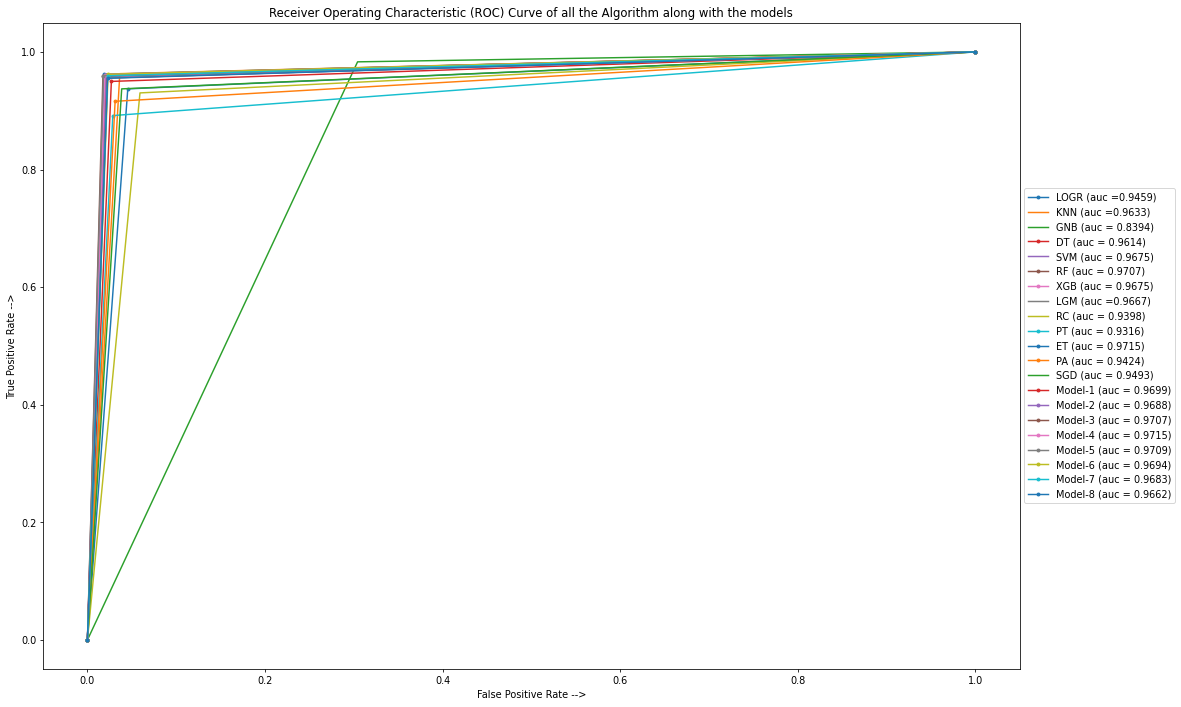

In [56]:
from sklearn.metrics import roc_curve, auc

LOGR_fpr, LOGR_tpr, threshold = metrics.roc_curve(y_test,X_test_prediction_log)
auc_LOGR = auc(LOGR_fpr, LOGR_tpr)
KNN_fpr, KNN_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_knn)
auc_KNN = auc(KNN_fpr, KNN_tpr)
GNB_fpr, GNB_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_gnb)
auc_GNB = auc(GNB_fpr, GNB_tpr)
DT_fpr, DT_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_dt)
auc_DT = auc(DT_fpr, DT_tpr)
svm_fpr, svm_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_svm)
auc_svm = auc(svm_fpr, svm_tpr)
RF_fpr, RF_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_rf)
auc_RF = auc(RF_fpr, RF_tpr)
XGB_fpr, XGB_tpr, threshold = metrics.roc_curve(y_test,X_test_prediction_xgb)
auc_XGB = auc(XGB_fpr, XGB_tpr)
LGM_fpr, LGM_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_lgm)
auc_LGM = auc(LGM_fpr, LGM_tpr)
RC_fpr, RC_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_rc)
auc_RC = auc(RC_fpr, RC_tpr)
PT_fpr, PT_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_pt)
auc_PT = auc(PT_fpr, PT_tpr)
ET_fpr, ET_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_et)
auc_ET = auc(ET_fpr, ET_tpr)
PA_fpr, PA_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_pa)
auc_PA = auc(PA_fpr, PA_tpr)
SGD_fpr, SGD_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_sgd)
auc_SGD = auc(SGD_fpr, SGD_tpr)


m1_fpr, m1_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_m1)
auc_m1 = auc(m1_fpr, m1_tpr)
m2_fpr, m2_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_m2)
auc_m2 = auc(m2_fpr, m2_tpr)
m3_fpr, m3_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_m3)
auc_m3 = auc(m3_fpr, m3_tpr)
m4_fpr, m4_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_m4)
auc_m4 = auc(m4_fpr, m4_tpr)
m5_fpr, m5_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_m5)
auc_m5 = auc(m5_fpr, m5_tpr)
m6_fpr, m6_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_m6)
auc_m6 = auc(m6_fpr, m6_tpr)
m7_fpr, m7_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_m7)
auc_m7 = auc(m7_fpr, m7_tpr)
m8_fpr, m8_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_m8)
auc_m8 = auc(m8_fpr, m8_tpr)



plt.figure(figsize=(18, 12), dpi=70)
plt.title('Receiver Operating Characteristic (ROC) Curve of all the Algorithm along with the models')
plt.plot(LOGR_fpr, LOGR_tpr, marker='.', label='LOGR (auc =0.9459)' % auc_LOGR)
plt.plot(KNN_fpr, KNN_tpr, linestyle='-', label='KNN (auc =0.9633)' % auc_KNN)
plt.plot(GNB_fpr, GNB_tpr, linestyle='-', label='GNB (auc = 0.8394)' % auc_GNB)
plt.plot(DT_fpr, DT_tpr, marker='.', label='DT (auc = 0.9614)' % auc_DT)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = 0.9675)' % auc_svm)
plt.plot(RF_fpr, RF_tpr, marker='.', label='RF (auc = 0.9707)' % auc_RF)
plt.plot(XGB_fpr, XGB_tpr, marker='.', label='XGB (auc = 0.9675) ' % auc_XGB)
plt.plot(LGM_fpr, LGM_tpr, linestyle='-', label='LGM (auc =0.9667)' % auc_LGM)
plt.plot(RC_fpr, RC_tpr, linestyle='-', label='RC (auc = 0.9398)' % auc_RC)
plt.plot(PT_fpr, PT_tpr, marker='.', label='PT (auc = 0.9316)' % auc_PT)
plt.plot(ET_fpr, ET_tpr, marker='.', label='ET (auc = 0.9715)' % auc_ET)
plt.plot(PA_fpr, PA_tpr, marker='.', label='PA (auc = 0.9424)' % auc_PA)
plt.plot(SGD_fpr, SGD_tpr, linestyle='-', label='SGD (auc = 0.9493)' % auc_SGD)


plt.plot(m1_fpr, m1_tpr, marker='.', label='Model-1 (auc = 0.9699)' % auc_m1)
plt.plot(m2_fpr, m2_tpr, marker='.', label='Model-2 (auc = 0.9688)' % auc_m2)
plt.plot(m3_fpr, m3_tpr, marker='.', label='Model-3 (auc = 0.9707)' % auc_m3)
plt.plot(m4_fpr, m4_tpr, marker='.', label='Model-4 (auc = 0.9715)' % auc_m4)
plt.plot(m5_fpr, m5_tpr, marker='.', label='Model-5 (auc = 0.9709)' % auc_m5)
plt.plot(m6_fpr, m6_tpr, marker='.', label='Model-6 (auc = 0.9694)' % auc_m6)
plt.plot(m7_fpr, m7_tpr, marker='.', label='Model-7 (auc = 0.9683)' % auc_m7)
plt.plot(m8_fpr, m8_tpr, marker='.', label='Model-8 (auc = 0.9662)' % auc_m8)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.show()

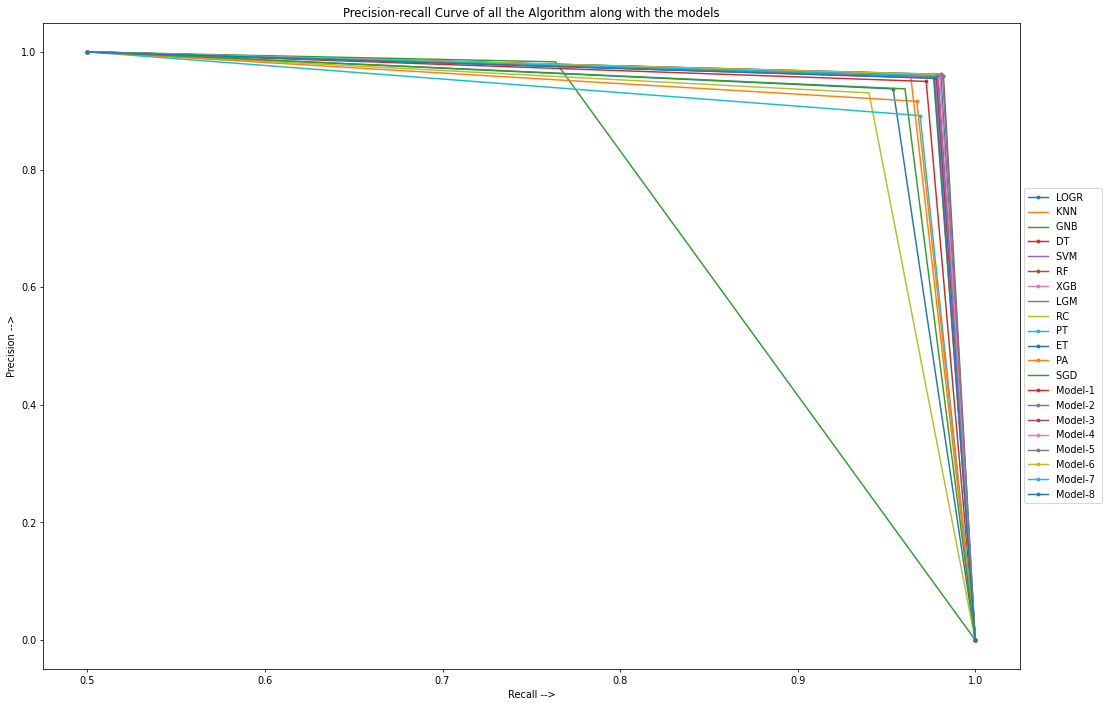

In [57]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

LOGR_recall, LOGR_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_log)
pr_LOGR = auc(LOGR_recall, LOGR_precision)
KNN_recall, KNN_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_knn)
pr_KNN = auc(KNN_recall, KNN_precision)
GNB_recall, GNB_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_gnb)
pr_GNB = auc(GNB_recall, GNB_precision)
DT_recall, DT_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_dt)
pr_DT = auc(DT_recall, DT_precision)
SVM_recall, SVM_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_svm)
pr_SVM = auc(SVM_recall, SVM_precision)
RF_recall, RF_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_rf)
pr_RF = auc(RF_recall, RF_precision)
XGB_recall, XGB_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_xgb)
pr_XGB = auc(XGB_recall, XGB_precision)
LGM_recall, LGM_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_lgm)
pr_LGM = auc(LGM_recall, LGM_precision)
RC_recall, RC_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_rc)
pr_RC = auc(RC_recall, RC_precision)
PT_recall, PT_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_pt)
pr_PT = auc(PT_recall, PT_precision)
ET_recall, ET_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_et)
pr_ET = auc(ET_recall, ET_precision)
PA_recall, PA_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_pa)
pr_PA = auc(PA_recall, PA_precision)
SGD_recall, SGD_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_sgd)
pr_SGD = auc(SGD_recall, SGD_precision)


m1_recall, m1_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_m1)
pr_m1 = auc(m1_recall, m1_precision)
m2_recall, m2_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_m2)
pr_m2 = auc(m2_recall, m2_precision)
m3_recall, m3_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_m3)
pr_m3 = auc(m3_recall, m3_precision)
m4_recall, m4_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_m4)
pr_m4 = auc(m4_recall, m4_precision)
m5_recall, m5_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_m5)
pr_m5 = auc(m5_recall, m5_precision)
m6_recall, m6_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_m6)
pr_m6 = auc(m6_recall, m6_precision)
m7_recall, m7_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_m7)
pr_m7 = auc(m7_recall, m7_precision)
m8_recall, m8_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_m8)
pr_m8 = auc(m8_recall, m8_precision)



plt.figure(figsize=(18, 12), dpi=70)
plt.title('Precision-recall Curve of all the Algorithm along with the models')
plt.plot(LOGR_recall, LOGR_precision, marker='.', label='LOGR ' % pr_LOGR)
plt.plot(KNN_recall, KNN_precision, linestyle='-', label='KNN ' % pr_KNN)
plt.plot(GNB_recall, GNB_precision, linestyle='-', label='GNB ' % pr_GNB)
plt.plot(DT_recall, DT_precision, marker='.', label='DT ' % pr_DT)
plt.plot(SVM_recall, SVM_precision, linestyle='-', label='SVM ' % pr_SVM)
plt.plot(RF_recall, RF_precision, marker='.', label='RF ' % pr_RF)
plt.plot(XGB_recall, XGB_precision, marker='.', label='XGB ' % pr_XGB)
plt.plot(LGM_recall, LGM_precision, linestyle='-', label='LGM ' % pr_LGM)
plt.plot(RC_recall, RC_precision, linestyle='-', label='RC ' % pr_RC)
plt.plot(PT_recall, PT_precision, marker='.', label='PT ' % pr_PT)
plt.plot(ET_recall, ET_precision, marker='.', label='ET ' % pr_ET)
plt.plot(PA_recall, PA_precision, marker='.', label='PA ' % pr_PA)
plt.plot(SGD_recall, SGD_precision, linestyle='-', label='SGD ' % pr_SGD)


plt.plot(m1_recall, m1_precision, marker='.', label='Model-1 ' % pr_m1)
plt.plot(m2_recall, m2_precision, marker='.', label='Model-2 ' % pr_m2)
plt.plot(m3_recall, m3_precision, marker='.', label='Model-3 ' % pr_m3)
plt.plot(m4_recall, m4_precision, marker='.', label='Model-4 ' % pr_m4)
plt.plot(m5_recall, m5_precision, marker='.', label='Model-5 ' % pr_m5)
plt.plot(m6_recall, m6_precision, marker='.', label='Model-6 ' % pr_m6)
plt.plot(m7_recall, m7_precision, marker='.', label='Model-7 ' % pr_m7)
plt.plot(m8_recall, m8_precision, marker='.', label='Model-8 ' % pr_m8)



plt.xlabel('Recall -->')
plt.ylabel('Precision -->')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()